# Check the effect of different windowsize

In [1]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

from param import *

sns.set_theme(style="whitegrid")
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

Text(0.5, 0.98, 'the effect of gaussian kernel window size')

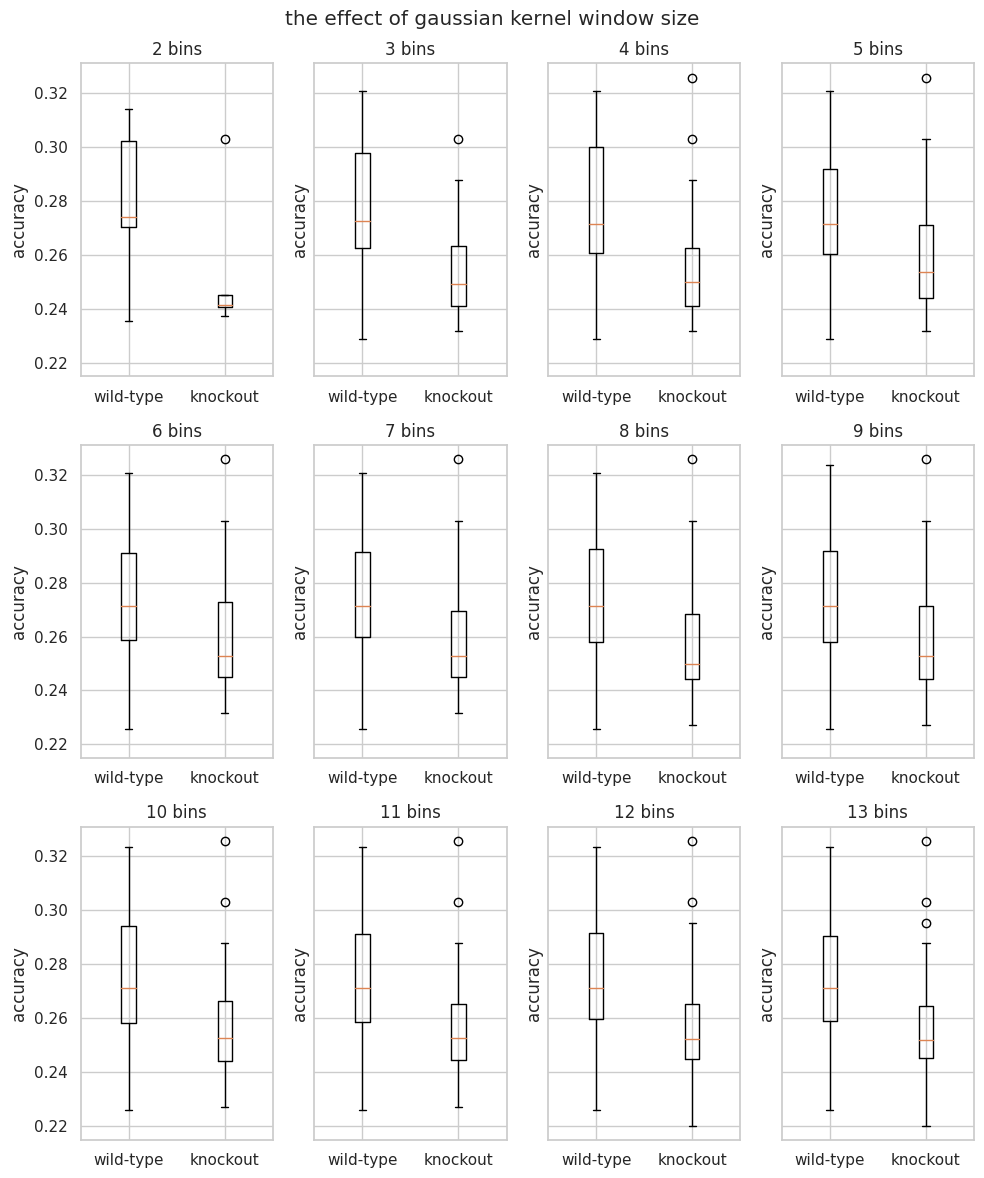

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 12), tight_layout = True, sharey=True)
axes = axes.ravel()

accu_KO, accu_WT = [], []
for ws_i in range(12):
    for m_id, data_dir in enumerate(datalist):
        data_name = str(data_dir).split('/')[-1]
        with open(ParamDir().output_dir/data_name/(f"sm_train_diff_windowsize.pickle"),"rb") as f:
            results_all = pickle.load(f)
        results = results_all[ws_i]
        accu = np.sum((results["y_test"]==results["y_pred"]))/len(results["y_pred"])
        if "KO" in data_name:
            accu_KO.append(accu)
        else:
            accu_WT.append(accu)


    axes[ws_i].boxplot([accu_WT, accu_KO])
    axes[ws_i].set_xticklabels(['wild-type', 'knockout'])
    axes[ws_i].set_ylabel("accuracy")

    window_size = results["window_size"]
    axes[ws_i].set_title(f"{window_size} bins")
plt.suptitle("the effect of gaussian kernel window size")


## window size == 10

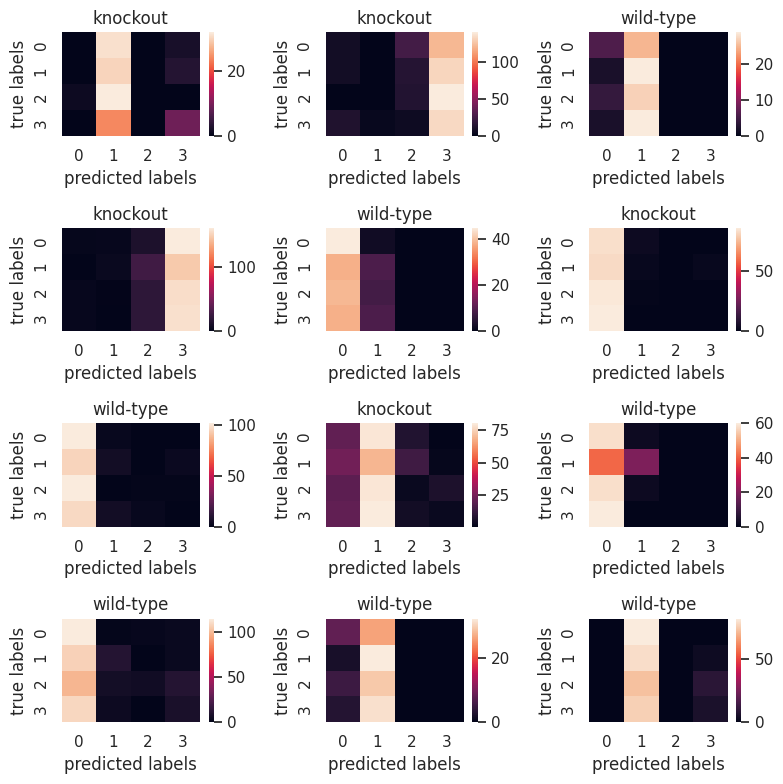

In [21]:
fig, axes = plt.subplots(figsize=(8,8),nrows = 4, ncols = 3, tight_layout = True)
axes = axes.ravel()

for id_, data_dir in enumerate(ParamDir().data_path_list):
    data_name = str(data_dir).split('/')[-1]
    with open(ParamDir().output_dir/data_name/(f"sm_train_diff_windowsize.pickle"),"rb") as f:
        results_all = pickle.load(f)
    results = [results for results in results_all if results["window_size"]==12][0]
    sns.heatmap(confusion_matrix(results["y_test"], results["y_pred"]), ax=axes[id_])
    axes[id_].set_xlabel("predicted labels")
    axes[id_].set_ylabel("true labels")
    if "KO" in str(data_dir):
        mouse_type = "knockout"
    else:
        mouse_type = "wild-type"
    axes[id_].set_title(mouse_type)